In [1]:
import nibabel as nb

In [33]:
import scipy as sp
from scipy import ndimage

In [185]:


mask = np.ma.masked_equal(sp.ndimage.binary_dilation(lc_l[:, :, :], iterations=3), 0)
mask = sp.ndimage.binary_dilation(lc_l[:, :, :], iterations=0)

In [191]:
tse.shape


(512, 512, 14)

In [208]:
extent = (200, 300, 0, 16)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


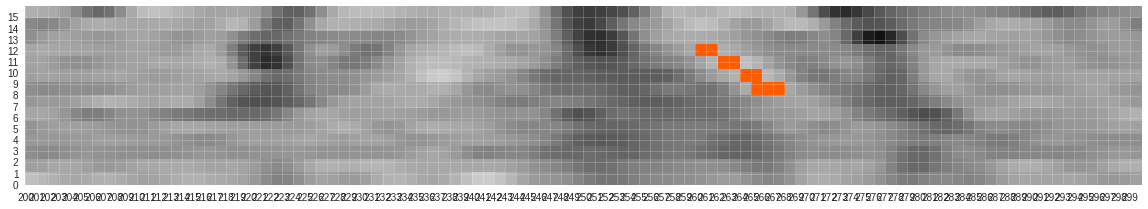

In [230]:
fig = plt.figure(figsize=(20, 10))
ax= plt.subplot(111)
plt.imshow(tse[extent[0]:extent[1], com[1], :].T, origin='lower', cmap=plt.cm.gray, interpolation='nearest', extent=extent, vmin=200, vmax=800, aspect=1.96/2.75)
plt.contour(mask[extent[0]:extent[1], com[1], :].T, levels=[0, 1], origin='lower', antialiased=False)
plt.imshow(lc_l[extent[0]:extent[1], com[1], :].T, origin='lower', extent=extent, interpolation='nearest', vmin=0, vmax=2, cmap=plt.cm.hot)
_ = plt.xticks(np.arange(extent[0], extent[1]))
_ = plt.yticks(np.arange(extent[2], extent[3]))
# _ = plt.yticks(np.arange(0, 16))

plt.gca().grid(which='major', alpha=0.2)     
# plt.gca().grid(which='minor', alpha=0.2)

# plt.grid(alpha=0.1, which='minor')

In [242]:
np.diff([[0, 0, 0, 1, 1, 1, 0, 0, 0]], 0)

[[0, 0, 0, 1, 1, 1, 0, 0, 0]]

In [285]:
def plot_vertical(x, y, **kwargs):
    plt.plot([x-.5, x-.5], [y-.5, y+.5], **kwargs)
    
def plot_horizontal(x, y, **kwargs):
    plt.plot([x-.5, x+.5], [y-.5, y-.5], **kwargs)

In [297]:
np.where(diff_0 == -1)

(array([261, 263, 265, 267]), array([10,  9,  8,  7]))

In [335]:
extent = np.array([200, 300, 0, 14])

In [336]:
np.where(diff_0 == 1)

(array([259, 261, 263, 264]), array([10,  9,  8,  7]))

In [337]:
lc_l.shape

(512, 512, 14)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(100, 400)

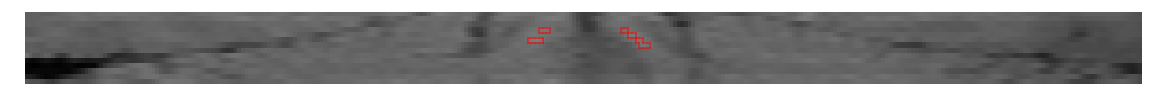

In [375]:
plt.figure(figsize=(20, 10))


# S00

In [382]:
tse = nb.load('/home/gdholla1/data/daphne/clean/S00/tse.nii.gz').get_data()
epi2tse = nb.load('/home/gdholla1/data/daphne/registration/slab2tse/_subject_id_S00/run1_dtype_mcf_mask_gms_mean_flirt.nii.gz').get_data()
# lc_l = nb.load('/home/gdholla1/data/daphne/registration/conjunct_masks/_mask_LC_R_subject_id_S00/_interp_nearestneighbour/LC_R_conjunct_flirt.nii.gz').get_data()
lc_l = nb.load('/home/gdholla1/data/daphne/masks/tse_space/S00/LC_L_conjunct.nii.gz').get_data()
lc_r = nb.load('/home/gdholla1/data/daphne/masks/tse_space/S00/LC_R_conjunct.nii.gz').get_data()

com = sp.ndimage.center_of_mass(lc_l)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will resu

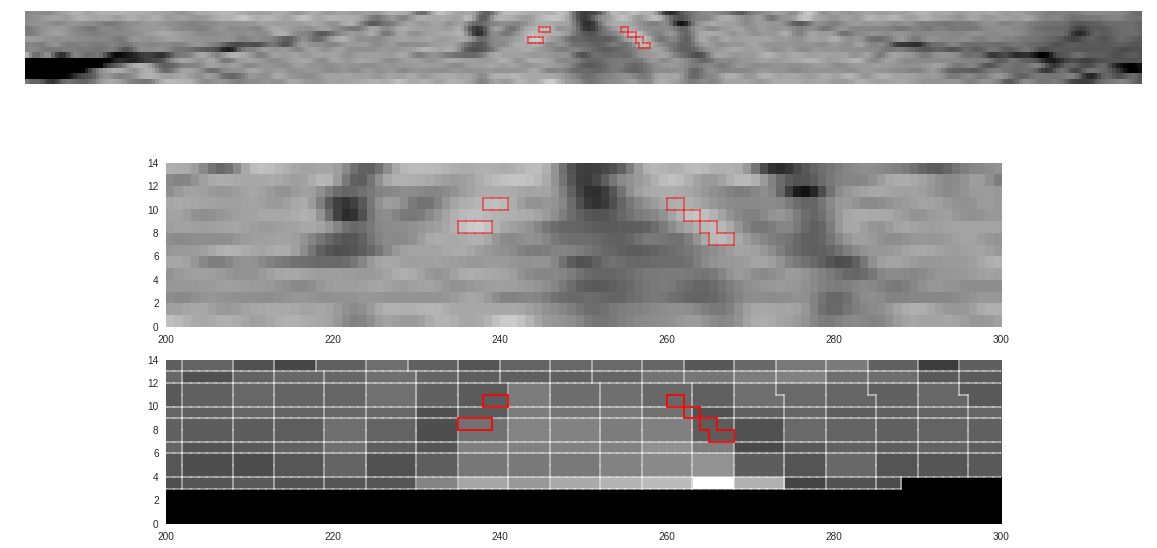

In [383]:
plt.figure(figsize=(20, 10))

plt.subplot(311)
plt.imshow(np.array(tse[:, com[1], :].T), origin='lower', extent=[0, tse.shape[0], 0, tse.shape[2]], cmap=plt.cm.gray, interpolation='nearest', aspect=2.75/1.96, vmin=200, vmax=800)
plot_mask_outline(lc_l[:, com[1], :], c='r', alpha=.5)
plot_mask_outline(lc_r[:, com[1], :], c='r', alpha=.5)
plt.grid('off')
plt.axis('off')
plt.xlim(100, 400)

plt.subplot(312)
plt.imshow(np.array(tse[extent[0]:extent[1], com[1], extent[2]:extent[3]].T), origin='lower', extent=extent, cmap=plt.cm.gray, interpolation='nearest', aspect=2.75/1.96, vmin=200, vmax=800)
plot_mask_outline(lc_l[:, com[1], :], c='r', alpha=.5)
plot_mask_outline(lc_r[:, com[1], :], c='r', alpha=.5)
plt.grid('off')

plt.subplot(313)
plt.imshow(np.array(epi2tse[extent[0]:extent[1], com[1], extent[2]:extent[3]].T), origin='lower', extent=extent, cmap=plt.cm.gray, interpolation='nearest', aspect=2.75/1.96)
plot_mask_outline(epi2tse[:, com[1], :], c='w', alpha=.5)
plot_mask_outline(lc_l[:, com[1], :], c='r', alpha=1.)
plot_mask_outline(lc_r[:, com[1], :], c='r', alpha=1.)
plt.xlim(extent[0], extent[1])
plt.grid('off')

# S16

In [386]:
tse = nb.load('/home/gdholla1/data/daphne/clean/S16/tse.nii.gz').get_data()
epi2tse = nb.load('/home/gdholla1/data/daphne/registration/slab2tse/_subject_id_S16/run1_dtype_mcf_mask_gms_mean_flirt.nii.gz').get_data()
# lc_l = nb.load('/home/gdholla1/data/daphne/registration/conjunct_masks/_mask_LC_R_subject_id_S00/_interp_nearestneighbour/LC_R_conjunct_flirt.nii.gz').get_data()
lc_l = nb.load('/home/gdholla1/data/daphne/masks/tse_space/S16/LC_L_conjunct.nii.gz').get_data()
lc_r = nb.load('/home/gdholla1/data/daphne/masks/tse_space/S16/LC_R_conjunct.nii.gz').get_data()

com = sp.ndimage.center_of_mass(lc_r)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will resu

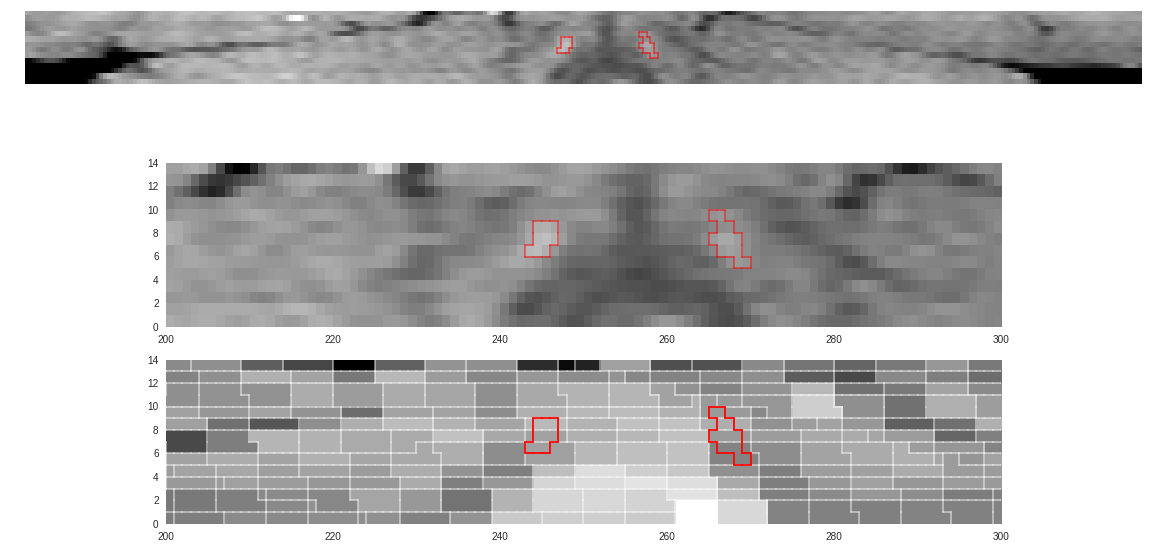

In [387]:
plt.figure(figsize=(20, 10))

plt.subplot(311)
plt.imshow(np.array(tse[:, com[1], :].T), origin='lower', extent=[0, tse.shape[0], 0, tse.shape[2]], cmap=plt.cm.gray, interpolation='nearest', aspect=2.75/1.96, vmin=200, vmax=800)
plot_mask_outline(lc_l[:, com[1], :], c='r', alpha=.5)
plot_mask_outline(lc_r[:, com[1], :], c='r', alpha=.5)
plt.grid('off')
plt.axis('off')
plt.xlim(100, 400)

plt.subplot(312)
plt.imshow(np.array(tse[extent[0]:extent[1], com[1], extent[2]:extent[3]].T), origin='lower', extent=extent, cmap=plt.cm.gray, interpolation='nearest', aspect=2.75/1.96, vmin=200, vmax=800)
plot_mask_outline(lc_l[:, com[1], :], c='r', alpha=.5)
plot_mask_outline(lc_r[:, com[1], :], c='r', alpha=.5)
plt.grid('off')

plt.subplot(313)
plt.imshow(np.array(epi2tse[extent[0]:extent[1], com[1], extent[2]:extent[3]].T), origin='lower', extent=extent, cmap=plt.cm.gray, interpolation='nearest', aspect=2.75/1.96)
plot_mask_outline(epi2tse[:, com[1], :], c='w', alpha=.5)
plot_mask_outline(lc_l[:, com[1], :], c='r', alpha=1.)
plot_mask_outline(lc_r[:, com[1], :], c='r', alpha=1.)
plt.xlim(extent[0], extent[1])
plt.grid('off')

# S03

In [468]:
def plot_mask_outline(mask, extent=None, **kwargs):
    
    
    if extent:
        mask[:extent[0], :] = 0
        mask[extent[1]:, :] = 0
        mask[:, :extent[2]] = 0
        mask[:, extent[3]:] = 0        
    
    diff_0 = np.diff(np.array(mask), axis=0)
    diff_1 = np.diff(np.array(mask), axis=1)
    
    for x, y in zip(*np.where(diff_0 != 0)):
        plt.plot([x+1, x+1], [y, y+1.], **kwargs)

    
    for x, y in zip(*np.where(diff_1 != 0)):
        plt.plot([x, x+1], [y+1, y+1], **kwargs)

In [447]:
diff_0 = np.diff(np.array(lc_l[:, com[1], :]), axis=0)
np.where(diff_0 !=0)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


(array([265, 266, 267, 268, 269, 271]), array([9, 8, 9, 7, 8, 7]))

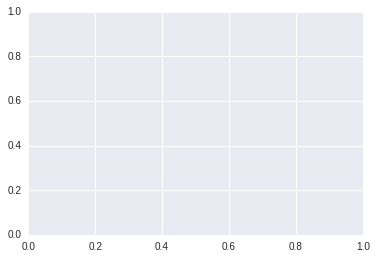

In [459]:
ax = plt.gca()

[]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:31: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:32: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:33: DeprecationWarning: using a non-integer number instead of an integer will r

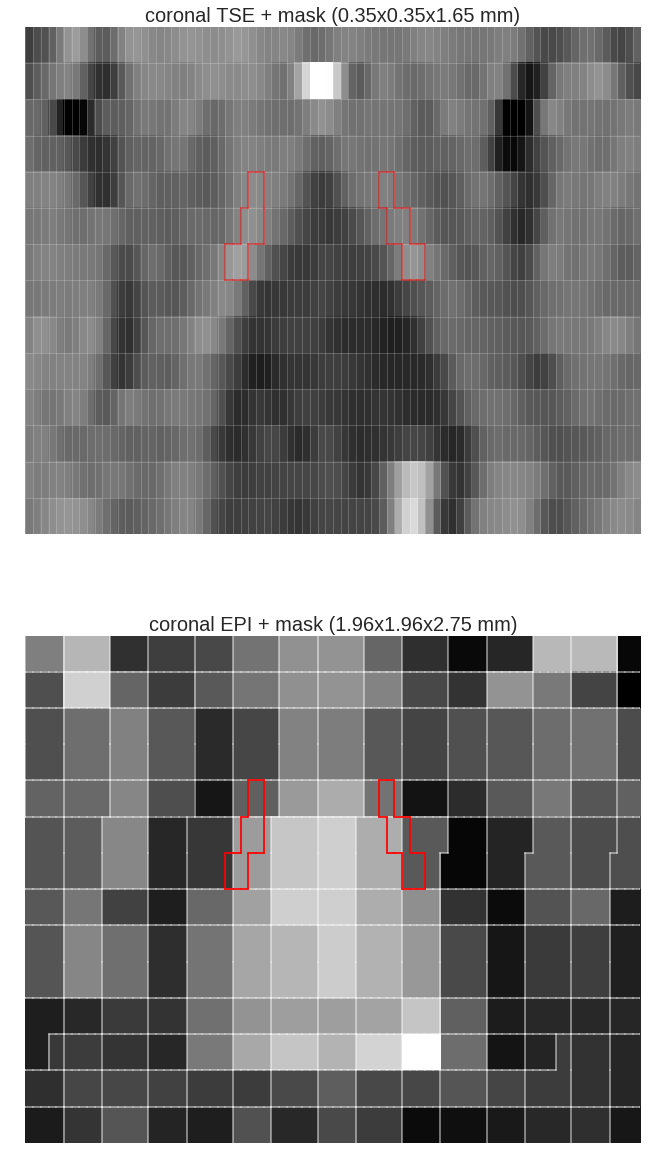

In [463]:
tse = nb.load('/home/gdholla1/data/daphne/clean/S03/tse.nii.gz').get_data()
epi2tse = nb.load('/home/gdholla1/data/daphne/registration/slab2tse/_subject_id_S03/run1_dtype_mcf_mask_gms_mean_flirt.nii.gz').get_data()
# lc_l = nb.load('/home/gdholla1/data/daphne/registration/conjunct_masks/_mask_LC_R_subject_id_S00/_interp_nearestneighbour/LC_R_conjunct_flirt.nii.gz').get_data()
lc_l = nb.load('/home/gdholla1/data/daphne/masks/tse_space/S03/LC_L_conjunct.nii.gz').get_data()
lc_r = nb.load('/home/gdholla1/data/daphne/masks/tse_space/S03/LC_R_conjunct.nii.gz').get_data()

com = sp.ndimage.center_of_mass(lc_r)

plt.figure(figsize=(15, 20))


extent = (220, 300, 0, 14)

plt.subplot(211)
plt.imshow(np.array(tse[extent[0]:extent[1], com[1], extent[2]:extent[3]].T), origin='lower', extent=extent, cmap=plt.cm.gray, interpolation='nearest', aspect=1.65/.35, vmin=200, vmax=800)
# plt.imshow(np.array((lc_l + lc_r)[extent[0]:extent[1], com[1], extent[2]:extent[3]].T), origin='lower', extent=extent, cmap=plt.cm.gray, interpolation='nearest', aspect=1.65/.35, vmin=0, vmax=1)
# plt.imshow(np.array(lc_r[extent[0]:extent[1], com[1], extent[2]:extent[3]].T), origin='lower', extent=extent, cmap=plt.cm.gray, interpolation='nearest', aspect=1.65/.35, vmin=0, vmax=1)
plot_mask_outline(lc_l[:, com[1], :], c='r', alpha=.5)
plot_mask_outline(lc_r[:, com[1], :], c='r', alpha=.5)
# plt.grid('off')
plt.xticks(np.arange(extent[0], extent[1]))
plt.yticks(np.arange(extent[2], extent[3]))
plt.gca().grid(which='major', alpha=0.2) 
plt.title('coronal TSE + mask (0.35x0.35x1.65 mm)', fontsize=20)
# plt.axis('off')
# plt.gca().set_xticks([''] * (extent[1] - extent[0]))
plt.gca().set_xticklabels('')
plt.gca().set_yticklabels('')

plt.subplot(212)
plt.imshow(np.array(epi2tse[extent[0]:extent[1], com[1], extent[2]:extent[3]].T), origin='lower', extent=extent, cmap=plt.cm.gray, interpolation='nearest', aspect=1.65/.35)
plot_mask_outline(epi2tse[:, com[1], :], c='w', alpha=.5)
plot_mask_outline(lc_l[:, com[1], :], c='r', alpha=1.)
plot_mask_outline(lc_r[:, com[1], :], c='r', alpha=1.)
plt.xlim(extent[0], extent[1])
plt.grid('off')
plt.axis('off')
plt.title('coronal EPI + mask (1.96x1.96x2.75 mm)', fontsize=20)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:26: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will r

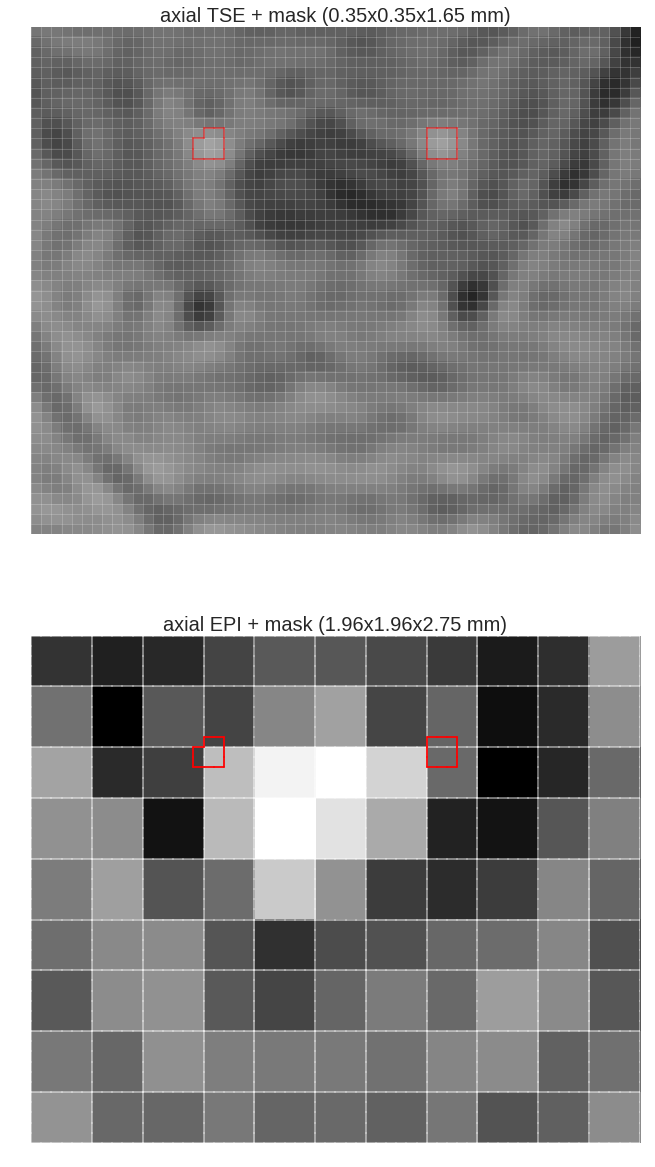

In [472]:
tse = nb.load('/home/gdholla1/data/daphne/clean/S03/tse.nii.gz').get_data()
epi2tse = nb.load('/home/gdholla1/data/daphne/registration/slab2tse/_subject_id_S03/run1_dtype_mcf_mask_gms_mean_flirt.nii.gz').get_data()
# lc_l = nb.load('/home/gdholla1/data/daphne/registration/conjunct_masks/_mask_LC_R_subject_id_S00/_interp_nearestneighbour/LC_R_conjunct_flirt.nii.gz').get_data()
lc_l = nb.load('/home/gdholla1/data/daphne/masks/tse_space/S03/LC_L_conjunct.nii.gz').get_data()
lc_r = nb.load('/home/gdholla1/data/daphne/masks/tse_space/S03/LC_R_conjunct.nii.gz').get_data()

com = sp.ndimage.center_of_mass(lc_r)

plt.figure(figsize=(15, 20))
extent = [230, 290, 190, 240]

plt.subplot(211)
plt.imshow(np.array(tse[extent[0]:extent[1], extent[2]:extent[3], com[2]].T), origin='lower', extent=extent, cmap=plt.cm.gray, interpolation='nearest', vmin=200, vmax=800)
# plt.imshow(np.array(lc_l[extent[0]:extent[1], extent[2]:extent[3], com[2]].T), origin='lower', extent=extent, cmap=plt.cm.gray, interpolation='nearest', vmin=0, vmax=1)
plot_mask_outline(lc_l[:, :, com[2]], c='r', alpha=.5)
plot_mask_outline(lc_r[:, :, com[2]], c='r', alpha=.5)
plt.xticks(np.arange(extent[0], extent[1]))
plt.yticks(np.arange(extent[2], extent[3]))
plt.gca().grid(which='major', alpha=0.2) 
plt.title('axial TSE + mask (0.35x0.35x1.65 mm)', fontsize=20)
plt.gca().set_xticklabels('')
plt.gca().set_yticklabels('')

plt.subplot(212)
plt.imshow(np.array(epi2tse[extent[0]:extent[1], extent[2]:extent[3], com[2]].T), origin='lower', extent=extent, cmap=plt.cm.gray, interpolation='nearest')
plot_mask_outline(epi2tse[:, :, com[2]], c='w', alpha=.5, extent=extent)
plot_mask_outline(lc_l[:, :, com[2]], c='r', alpha=1.)
plot_mask_outline(lc_r[:, :, com[2]], c='r', alpha=1.)
plt.xlim(extent[0], extent[1])
plt.grid('off')
plt.axis('off')
plt.title('axial EPI + mask (1.96x1.96x2.75 mm)', fontsize=20)

# Functional space

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:43: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(40.0, 70.0, 0.0, 16.0)

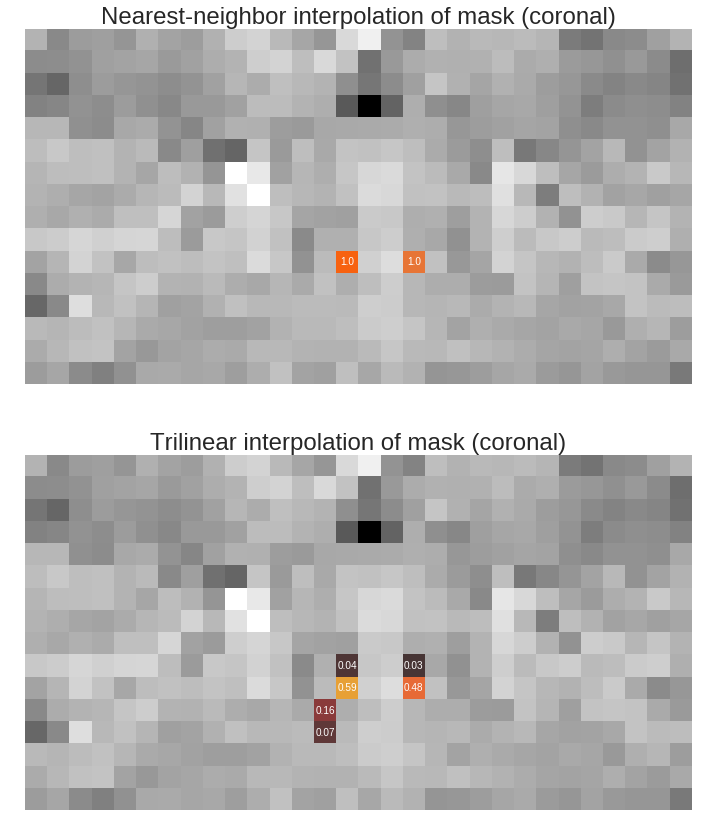

In [549]:
subject_id = 'S03'

lc_l_nn = nb.load('/home/gdholla1/data/daphne/registration_max/conjunct_masks/_subject_id_{}/_mask_LC_L/_interp_nearestneighbour/LC_L_conjunct_warp.nii.gz'.format(subject_id)).get_data()
lc_r_nn = nb.load('/home/gdholla1/data/daphne/registration_max/conjunct_masks/_subject_id_{}/_mask_LC_R/_interp_nearestneighbour/LC_R_conjunct_warp.nii.gz'.format(subject_id)).get_data()

lc_l_tri = nb.load('/home/gdholla1/data/daphne/registration_max/conjunct_masks/_subject_id_{}/_mask_LC_L/_interp_trilinear//LC_L_conjunct_warp.nii.gz'.format(subject_id)).get_data()
lc_r_tri = nb.load('/home/gdholla1/data/daphne/registration_max/conjunct_masks/_subject_id_{}/_mask_LC_R/_interp_trilinear//LC_R_conjunct_warp.nii.gz'.format(subject_id)).get_data()

mean_epi = nb.load('/home/gdholla1/data/daphne/preprocessed/mean_signal/_subject_id_S03/_fwhm_0.0/_tsnr0/run1_dtype_mcf_mask_gms_tempfilt_maths_tsnr_mean.nii.gz').get_data()

extent = [40, 70, 0, 16]

lc_l_nn = np.ma.masked_equal(lc_l_nn, 0)
lc_r_nn = np.ma.masked_equal(lc_r_nn, 0)
lc_l_tri = np.ma.masked_equal(lc_l_tri, 0)
lc_r_tri = np.ma.masked_equal(lc_r_tri, 0)

com = sp.ndimage.center_of_mass(lc_l_nn)

plt.figure(figsize=(12, 14))
plt.subplot(211)
plt.title('Nearest-neighbor interpolation of mask (coronal)', fontsize=24)
plt.imshow(mean_epi[extent[0]:extent[1], com[1], extent[2]:extent[3]].T, origin='lower', cmap=plt.cm.gray, interpolation='nearest', extent=extent)
plt.imshow(lc_l_nn[extent[0]:extent[1], com[1], extent[2]:extent[3]].T, origin='lower', cmap=plt.cm.hot, interpolation='nearest', vmin=0, vmax=2, alpha=.7, extent=extent)
plt.imshow(lc_r_nn[extent[0]:extent[1], com[1], extent[2]:extent[3]].T, origin='lower', cmap=plt.cm.hot, interpolation='nearest', vmin=0, vmax=2, alpha=.7, extent=extent)

xs, ys = np.where(lc_l_nn[:, com[1], :] > 0)

for x, y in zip(xs, ys):
    plt.text(x+.5, y+.5, np.round(lc_l_nn[x, com[1], y], 2), ha='center', va='center', color='w', fontsize=10)

plt.imshow(lc_r_nn[extent[0]:extent[1], com[1], extent[2]:extent[3]].T, origin='lower', cmap=plt.cm.hot, interpolation='nearest', vmin=0, vmax=2, alpha=.7, extent=extent)

xs, ys = np.where(lc_r_nn[:, com[1], :] > 0)

for x, y in zip(xs, ys):
    plt.text(x+.5, y+.5, np.round(lc_r_nn[x, com[1], y], 2), ha='center', va='center', color='w', fontsize=10)

plt.axis('off')

plt.subplot(212)
plt.title('Trilinear interpolation of mask (coronal)', fontsize=24)
plt.imshow(mean_epi[extent[0]:extent[1], com[1], extent[2]:extent[3]].T, origin='lower', cmap=plt.cm.gray, interpolation='nearest', extent=extent)
plt.imshow(lc_l_tri[extent[0]:extent[1], com[1], extent[2]:extent[3]].T, origin='lower', cmap=plt.cm.hot, interpolation='nearest', vmin=0, vmax=1, alpha=.7, extent=extent)

xs, ys = np.where(lc_l_tri[:, com[1], :] > 0)

for x, y in zip(xs, ys):
    plt.text(x+.5, y+.5, np.round(lc_l_tri[x, com[1], y], 2), ha='center', va='center', color='w', fontsize=10)

plt.imshow(lc_r_tri[extent[0]:extent[1], com[1], extent[2]:extent[3]].T, origin='lower', cmap=plt.cm.hot, interpolation='nearest', vmin=0, vmax=1, alpha=.7, extent=extent)

xs, ys = np.where(lc_r_tri[:, com[1], :] > 0)

for x, y in zip(xs, ys):
    plt.text(x+.5, y+.5, np.round(lc_r_tri[x, com[1], y], 2), ha='center', va='center', color='w', fontsize=10)

plt.axis('off')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:41: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(40.0, 70.0, 30.0, 60.0)

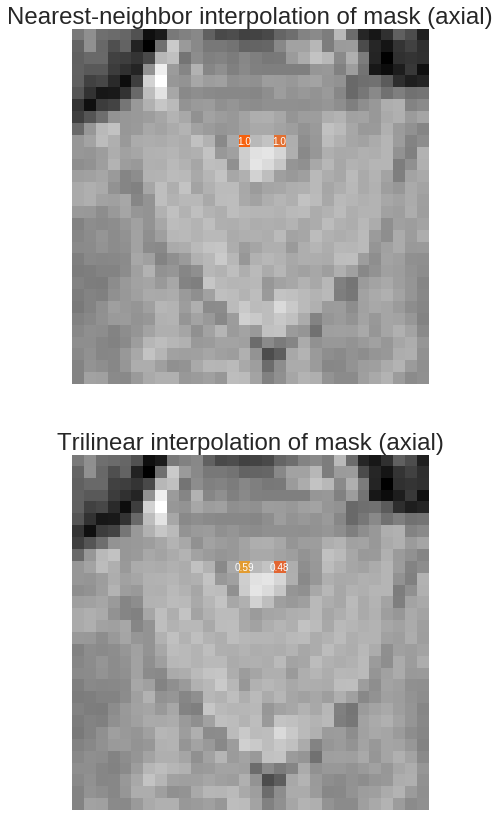

In [550]:
lc_l_nn = nb.load('/home/gdholla1/data/daphne/registration_max/conjunct_masks/_subject_id_S03/_mask_LC_L/_interp_nearestneighbour/LC_L_conjunct_warp.nii.gz').get_data()
lc_r_nn = nb.load('/home/gdholla1/data/daphne/registration_max/conjunct_masks/_subject_id_S03/_mask_LC_R/_interp_nearestneighbour/LC_R_conjunct_warp.nii.gz').get_data()

lc_l_tri = nb.load('/home/gdholla1/data/daphne/registration_max/conjunct_masks/_subject_id_S03/_mask_LC_L/_interp_trilinear//LC_L_conjunct_warp.nii.gz').get_data()
lc_r_tri = nb.load('/home/gdholla1/data/daphne/registration_max/conjunct_masks/_subject_id_S03/_mask_LC_R/_interp_trilinear//LC_R_conjunct_warp.nii.gz').get_data()

mean_epi = nb.load('/home/gdholla1/data/daphne/preprocessed/mean_signal/_subject_id_S03/_fwhm_0.0/_tsnr0/run1_dtype_mcf_mask_gms_tempfilt_maths_tsnr_mean.nii.gz').get_data()

extent = [40, 70, 30, 60]

lc_l_nn = np.ma.masked_equal(lc_l_nn, 0)
lc_r_nn = np.ma.masked_equal(lc_r_nn, 0)
lc_l_tri = np.ma.masked_equal(lc_l_tri, 0)
lc_r_tri = np.ma.masked_equal(lc_r_tri, 0)

com = sp.ndimage.center_of_mass(lc_l_nn)

plt.figure(figsize=(12, 14))
plt.subplot(211)
plt.title('Nearest-neighbor interpolation of mask (axial)', fontsize=24)
plt.imshow(mean_epi[extent[0]:extent[1], extent[2]:extent[3], com[2]].T, origin='lower', cmap=plt.cm.gray, interpolation='nearest', extent=extent)
plt.imshow(lc_l_nn[extent[0]:extent[1], extent[2]:extent[3], com[2]].T, origin='lower', cmap=plt.cm.hot, interpolation='nearest', vmin=0, vmax=2, alpha=.7, extent=extent)
plt.imshow(lc_r_nn[extent[0]:extent[1], extent[2]:extent[3], com[2]].T, origin='lower', cmap=plt.cm.hot, interpolation='nearest', vmin=0, vmax=2, alpha=.7, extent=extent)

xs, ys = np.where(lc_l_nn[:, :, com[2]] > 0)

for x, y in zip(xs, ys):
    plt.text(x+.5, y+.5, np.round(lc_l_nn[x, y, com[2]], 2), ha='center', va='center', color='w', fontsize=10)

plt.imshow(lc_r_nn[extent[0]:extent[1], extent[2]:extent[3], com[2]].T, origin='lower', cmap=plt.cm.hot, interpolation='nearest', vmin=0, vmax=2, alpha=.7, extent=extent)

xs, ys = np.where(lc_r_nn[:, :, com[2]] > 0)

for x, y in zip(xs, ys):
    plt.text(x+.5, y+.5, np.round(lc_r_nn[x, y, com[2]], 2), ha='center', va='center', color='w', fontsize=10)

plt.axis('off')

plt.subplot(212)
plt.title('Trilinear interpolation of mask (axial)', fontsize=24)
plt.imshow(mean_epi[extent[0]:extent[1], extent[2]:extent[3], com[2]].T, origin='lower', cmap=plt.cm.gray, interpolation='nearest', extent=extent)
plt.imshow(lc_l_tri[extent[0]:extent[1], extent[2]:extent[3], com[2]].T, origin='lower', cmap=plt.cm.hot, interpolation='nearest', vmin=0, vmax=1, alpha=.7, extent=extent)

xs, ys = np.where(lc_l_tri[:,  :, com[2]] > 0)

for x, y in zip(xs, ys):
    plt.text(x+.5, y+.5, np.round(lc_l_tri[x, y, com[2]], 2), ha='center', va='center', color='w', fontsize=10)

plt.imshow(lc_r_tri[extent[0]:extent[1], extent[2]:extent[3], com[2]].T, origin='lower', cmap=plt.cm.hot, interpolation='nearest', vmin=0, vmax=1, alpha=.7, extent=extent)

xs, ys = np.where(lc_r_tri[:, :, com[2]] > 0)

for x, y in zip(xs, ys):
    plt.text(x+.5, y+.5, np.round(lc_r_tri[x, y, com[2]], 2), ha='center', va='center', color='w', fontsize=10)

plt.axis('off')

(array([53, 53, 54, 54]), array([3, 4, 5, 6]))

In [502]:
xs, ys = np.where(lc_r[:, com[1], :] > 0)

for x, y in zip(xs, ys):
    plt.text(x, y, lc_r[x, com[1], y], ha='center', va='center')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(-0.5, 49.5, -0.5, 29.5)

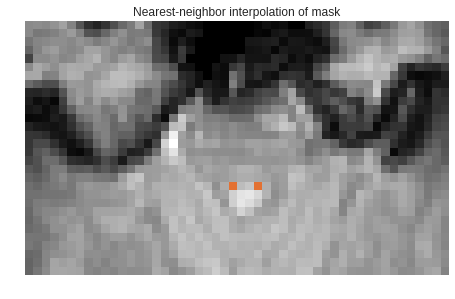

In [495]:
lc_l_nn = nb.load('/home/gdholla1/data/daphne/registration_max/conjunct_masks/_subject_id_S03/_mask_LC_L/_interp_nearestneighbour/LC_L_conjunct_warp.nii.gz').get_data()
lc_r_nn = nb.load('/home/gdholla1/data/daphne/registration_max/conjunct_masks/_subject_id_S03/_mask_LC_R/_interp_nearestneighbour/LC_R_conjunct_warp.nii.gz').get_data()

lc_l_tri = nb.load('/home/gdholla1/data/daphne/registration_max/conjunct_masks/_subject_id_S03/_mask_LC_L/_interp_trilinear//LC_L_conjunct_warp.nii.gz').get_data()
lc_r_tri = nb.load('/home/gdholla1/data/daphne/registration_max/conjunct_masks/_subject_id_S03/_mask_LC_R/_interp_trilinear//LC_R_conjunct_warp.nii.gz').get_data()

mean_epi = nb.load('/home/gdholla1/data/daphne/preprocessed/mean_signal/_subject_id_S03/_fwhm_0.0/_tsnr0/run1_dtype_mcf_mask_gms_tempfilt_maths_tsnr_mean.nii.gz').get_data()

extent = [30, 80, 40, 70]

lc_l_nn = np.ma.masked_equal(lc_l_nn, 0)
lc_r_nn = np.ma.masked_equal(lc_r_nn, 0)
lc_l_tri = np.ma.masked_equal(lc_l_tri, 0)
lc_r_tri = np.ma.masked_equal(lc_r_tri, 0)

com = sp.ndimage.center_of_mass(lc_l_nn)

plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.title('Nearest-neighbor interpolation of mask')
plt.imshow(mean_epi[extent[0]:extent[1], extent[2]:extent[3], com[2]].T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.imshow(lc_l_nn[extent[0]:extent[1], extent[2]:extent[3], com[2]].T, origin='lower', cmap=plt.cm.hot, interpolation='nearest', vmin=0, vmax=2, alpha=.7)
plt.imshow(lc_r_nn[extent[0]:extent[1], extent[2]:extent[3], com[2]].T, origin='lower', cmap=plt.cm.hot, interpolation='nearest', vmin=0, vmax=2, alpha=.7)
plt.axis('off')

plt.subplot(212)
plt.title('Trilinear interpolation of mask')
plt.imshow(mean_epi[extent[0]:extent[1], com[1], extent[2]:extent[3]].T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.imshow(lc_l_tri[extent[0]:extent[1], com[1], extent[2]:extent[3]].T, origin='lower', cmap=plt.cm.hot, interpolation='nearest', vmin=0, vmax=2, alpha=.7)
plt.imshow(lc_r_tri[extent[0]:extent[1], com[1], extent[2]:extent[3]].T, origin='lower', cmap=plt.cm.jet, interpolation='nearest', vmin=0, vmax=2, alpha=.7)

plt.axis('off')

In [551]:
from nipype.interfaces import fsl

In [553]:
warper = fsl.ApplyWarp()


warper.inputs.in_file = '/home/gdholla1/data/daphne/clean/S03/tse.nii.gz'
warper.inputs.ref_file = '/home/gdholla1/data/daphne/registration/t1_weighted_bet/_subject_id_S03/t1_brain.nii.gz'
warper.inputs.premat = '/home/gdholla1/data/daphne/registration_max/tse2t1_weighted/mats/S03.mat'
warper.inputs.field_file = '/home/gdholla1/data/daphne/registration_max/tse2t1_weighted/warps/S03.nii.gz'

r= warper.run()

# tSNR

In [555]:
import pandas
import glob
import re

In [584]:
reg = re.compile('/home/gdholla1/data/daphne/registration_max/tsnr/(?P<filtered>.*)/_subject_id_S(?P<subject_id>.*)/_mask_(?P<mask>.*)/_interp_(?P<interpolation>.*)/_extract_tsnr.*/run(?P<run>.*)_.*.txt')

fns = glob.glob('/home/gdholla1/data/daphne/registration_max/tsnr/*/_subject_id_*/_mask_*/_interp_trilinear/_extract_tsnr*/run*.txt')
# /home/gdholla1/data/daphne/registration_max/tsnr/phys_unfiltered/_subject_id_S00/_mask_LC_L/_interp_trilinear/_extract_tsnr0/run1_dtype_mcf_mask_gms_tempfilt_maths_tsnr_weighted.txt
df = []

for fn in fns:
    df.append(reg.match(fn).groupdict())
    df[-1]['tsnr'] = np.loadtxt(fn)
    
    if df[-1]['tsnr'] == 0:
        df[-1]['tsnr'] = np.nan
        
    

In [585]:
df[-1]

{'filtered': 'phys_unfiltered',
 'interpolation': 'trilinear',
 'mask': 'LC_L',
 'run': '3_dtype_mcf_mask_gms_tempfilt_maths_tsnr',
 'subject_id': '06',
 'tsnr': array(47.06837844848633)}

In [587]:
df = pandas.DataFrame(df)

In [ ]:
df.

In [592]:
sns.set_context('poster')
sns.set_style('white')

In [598]:
df.filtered.unique()

array(['phys_filtered', 'phys_unfiltered'], dtype=object)

In [599]:
df['Noise filtering'] = df.filtered.map({'phys_filtered':'physiological noise filtered', 'phys_unfiltered':'no physiological noise filtered'})

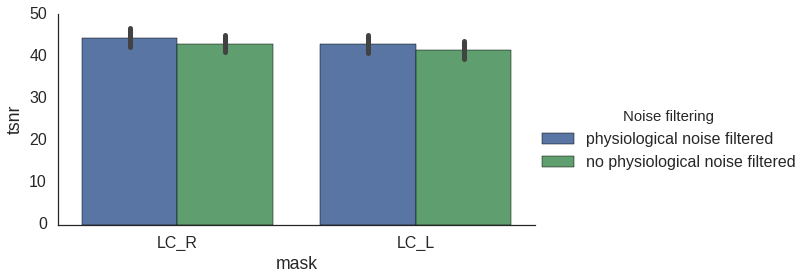

In [600]:
sns.factorplot('mask', 'tsnr', 'Noise filtering', df, kind='bar', aspect=2)

In [575]:
fns

[]